# Using the Data Imputator on a Real Public Dataset, Herold et al. (2020)

In this example, we will be using the GP imputator on a dataset available at [Herold et al., 2020](https://doi.org/10.1038/s41467-020-19006-2).

In [1]:
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import seaborn as sns



from mimic.data_imputation.impute_GP import GPImputer

In [2]:
data = pd.read_csv(r'Source Data/fig3ab.tsv', delimiter='\t')

data.head(15)

,genus,date,val,type
0,Acidimicrobium,2011-03-21,8.322484,MG
1,Acidimicrobium,2011-03-29,7.664534,MG
2,Acidimicrobium,2011-04-05,7.871188,MG
3,Acidimicrobium,2011-04-14,6.695900,MG
4,Acidimicrobium,2011-04-21,6.695177,MG
5,Acidimicrobium,2011-04-29,6.304652,MG
6,Acidimicrobium,2011-05-06,7.462918,MG
7,Acidimicrobium,2011-05-13,7.742366,MG
8,Acidimicrobium,2011-05-20,6.627358,MG
9,Acidimicrobium,2011-05-27,7.425880,MG


# separate the data into MG and MT datasets

The data is separated into two datasets, MG and MT. The MG dataset contains the meta-genomics data, while the MT dataset contains the meta-transcriptomics. We will be using the MG dataset in this example.


In [3]:
# separate the data into MG and MT datasets

dataMG = data[data['type'] == 'MG']

dataMG.info()

dataMT = data[data['type'] == 'MT']

dataMT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 611
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   genus   561 non-null    object 
 1   date    612 non-null    object 
 2   val     612 non-null    float64
 3   type    612 non-null    object 
dtypes: float64(1), object(3)
memory usage: 23.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 612 to 1172
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   genus   510 non-null    object 
 1   date    561 non-null    object 
 2   val     561 non-null    float64
 3   type    561 non-null    object 
dtypes: float64(1), object(3)
memory usage: 21.9+ KB


In [4]:
# Data cleaning
# Rename Nan in the genus column to 'Other'

dataMG['genus'] = dataMG['genus'].replace(np.nan, 'Other')

# Drop the 'type' column
dataMG = dataMG.drop(columns=['type'])

# Change relative Date columns to days
dataMG['date'] = pd.to_datetime(dataMG['date'])
dataMG['date'] = (dataMG['date'] - dataMG['date'].min()).dt.days

# Change the 'genus' column to a categorical column
dataMG['genus'] = dataMG['genus'].astype('category')


dataMG.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 611
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   genus   612 non-null    category
 1   date    612 non-null    int64   
 2   val     612 non-null    float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 15.3 KB


C:\Users\User\AppData\Local\Temp\ipykernel_42040\1446871442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMG['genus'] = dataMG['genus'].replace(np.nan, 'Other')


c:\ProgramData\anaconda3\envs\MIMIC\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\MIMIC\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\MIMIC\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


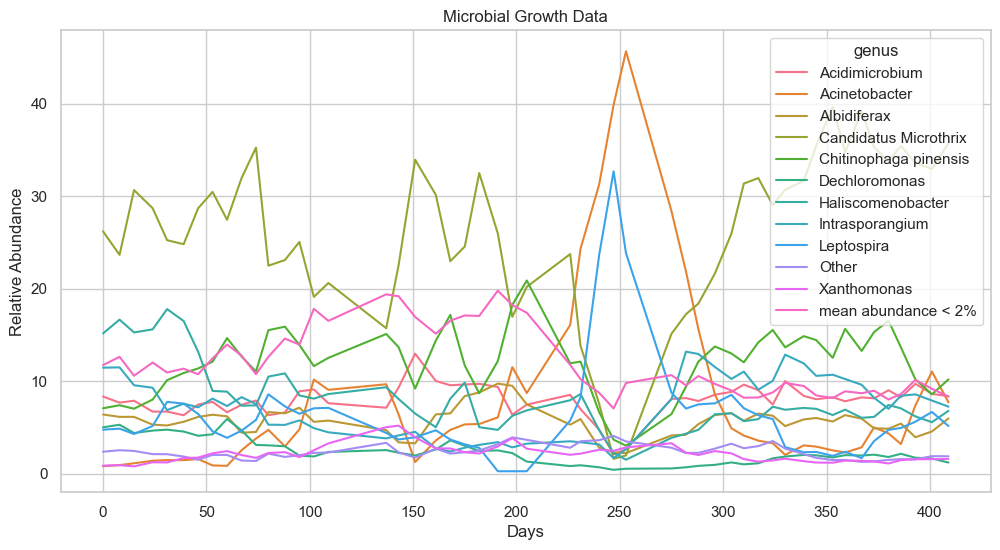

In [5]:
# Plot the data, relative abundance (value) vs. days (date) for each genus


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='val', hue='genus', data=dataMG)
plt.title('Microbial Growth Data')
plt.xlabel('Days')
plt.ylabel('Relative Abundance')
plt.show()

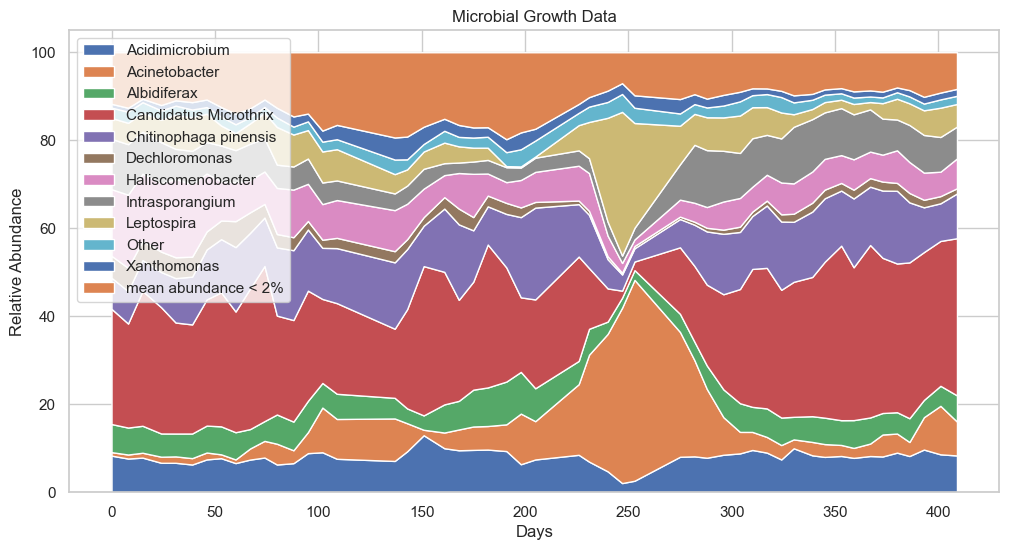

In [6]:
# Pivot the data so each 'genus' is a column
dataMG_pivot = dataMG.pivot(
    index='date', columns='genus', values='val').fillna(0)

# Create a stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(dataMG_pivot.index, dataMG_pivot.T, labels=dataMG_pivot.columns)

plt.title('Microbial Growth Data')
plt.xlabel('Days')
plt.ylabel('Relative Abundance')
plt.legend(loc='upper left')

plt.show()

In [7]:

# Create a DataFrame with a complete range of days
all_days = pd.DataFrame(
    {'days': range(dataMG['date'].min(), dataMG['date'].max() + 1)})

# Reindex the pivoted DataFrame to include all days, filling missing values with None
complete_dataMG = dataMG_pivot.reindex(all_days['days'])

complete_dataMG.head(15)

genus,Acidimicrobium,Acinetobacter,Albidiferax,Candidatus Microthrix,Chitinophaga pinensis,Dechloromonas,Haliscomenobacter,Intrasporangium,Leptospira,Other,Xanthomonas,mean abundance < 2%
days,,,,,,,,,,,,
0,8.322484,0.791870,6.383491,26.180838,7.055585,4.998287,15.142620,11.445072,4.742982,2.357318,0.853658,11.725795
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7.664534,0.911291,6.125822,23.641355,7.383681,5.273044,16.636265,11.476739,4.850959,2.520630,0.903478,12.612201


In [8]:
complete_dataMG.columns

CategoricalIndex(['Acidimicrobium', 'Acinetobacter', 'Albidiferax',
                  'Candidatus Microthrix', 'Chitinophaga pinensis',
                  'Dechloromonas', 'Haliscomenobacter', 'Intrasporangium',
                  'Leptospira', 'Other', 'Xanthomonas', 'mean abundance < 2%'],
                 categories=['Acidimicrobium', 'Acinetobacter', 'Albidiferax', 'Candidatus Microthrix', ..., 'Leptospira', 'Other', 'Xanthomonas', 'mean abundance < 2%'], ordered=False, dtype='category', name='genus')

In [9]:
complete_dataMG['Acinetobacter'].isnull().sum()

359

In [10]:
# Reset the index
complete_dataMG_reset = complete_dataMG.reset_index()

# Make index as float
complete_dataMG_reset['days'] = complete_dataMG_reset['days'].astype(float)

Model: VGP
Best kernel: <class 'gpflow.kernels.stationaries.RationalQuadratic'>
BIC: 236147.03324540867


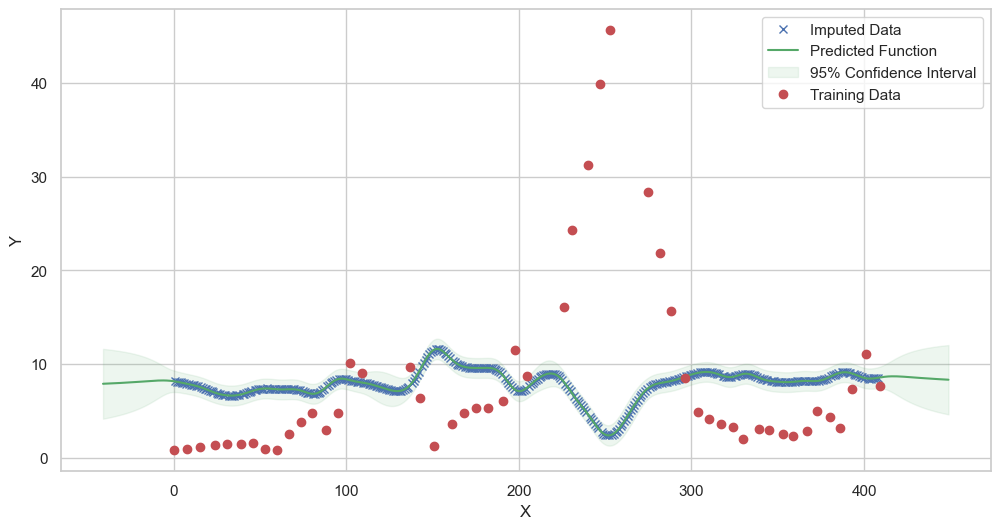

In [11]:
# Now 'days' is a regular column and you can use it as a feature
new_dataset = GPImputer().impute_missing_values(
    complete_dataMG_reset, ['days'], ['Acidimicrobium', 'Acinetobacter', 'Albidiferax'], 'Acinetobacter'
)

In [12]:
new_dataset['Acinetobacter'].isnull().sum()

0

Model: VGP
Best kernel: <class 'gpflow.kernels.stationaries.RationalQuadratic'>
BIC: 4811115.618247565


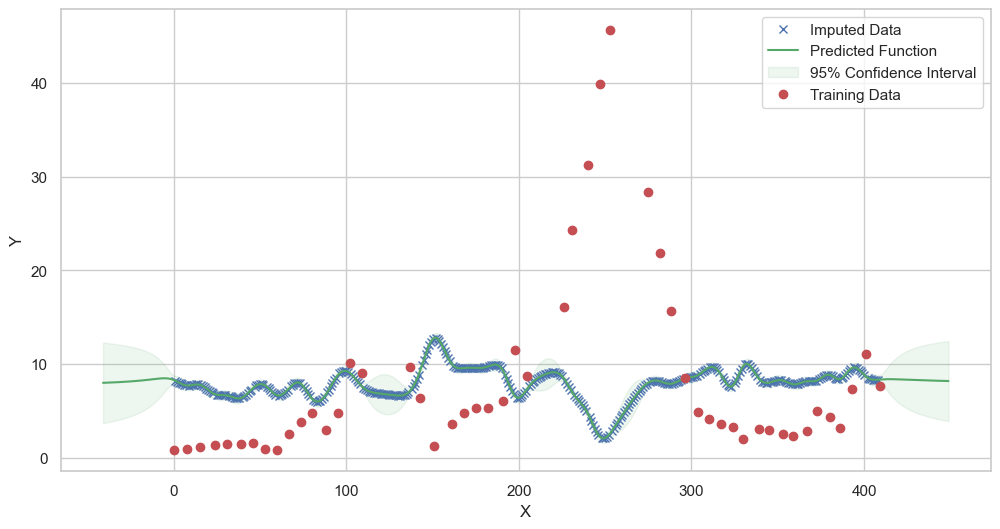

In [13]:
# Now 'days' is a regular column and you can use it as a feature
new_dataset = GPImputer().impute_missing_values(
    complete_dataMG_reset, ['days'], ['Acidimicrobium', 'Acinetobacter', 'Albidiferax',
                  'Candidatus Microthrix', 'Chitinophaga pinensis',
                  'Dechloromonas', 'Haliscomenobacter', 'Intrasporangium',
                  'Leptospira', 'Other', 'Xanthomonas', 'mean abundance < 2%'], 'Acinetobacter'
)

Model: GPR
Best kernel: <class 'gpflow.kernels.stationaries.RationalQuadratic'>
BIC: -248.40300696649717


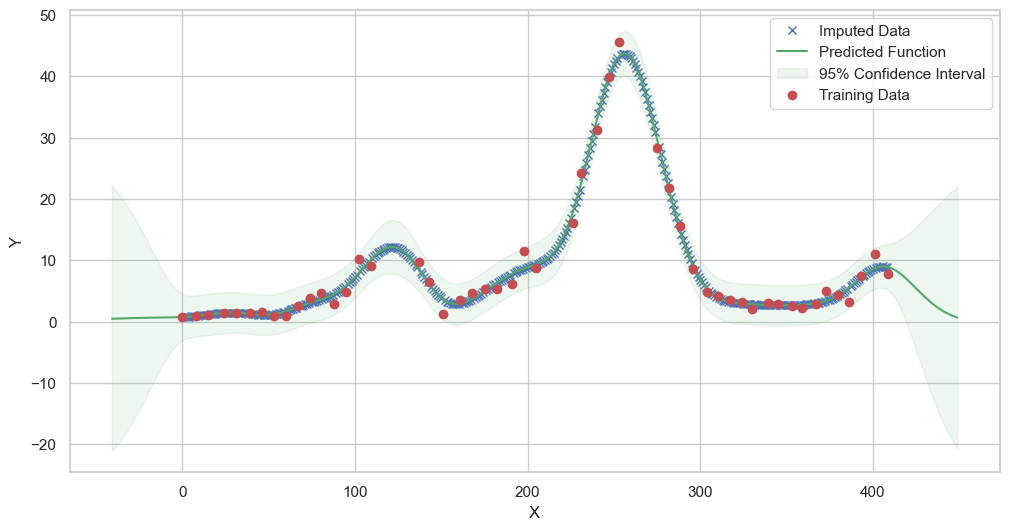

In [14]:
# Now 'days' is a regular column and you can use it as a feature
new_dataset2 = GPImputer().impute_missing_values(
    complete_dataMG_reset, ['days'], ['Acinetobacter'], 'Acinetobacter'
)